# Week Smoothing Addive Terms

## Pb() And Pbz

Fits a generalized additive model for location, scale, and shape (GAMLSS) to predict the variable y using a penalized spline (pb()) 

In [3]:
library(gamlss)

Loading required package: splines

Loading required package: gamlss.data


Attaching package: ‘gamlss.data’


The following object is masked from ‘package:datasets’:

    sleep


Loading required package: gamlss.dist

Loading required package: nlme

Loading required package: parallel

 **********   GAMLSS Version 5.4-20  ********** 

For more on GAMLSS look at https://www.gamlss.com/

Type gamlssNews() to see new features/changes/bug fixes.




In [5]:
data(abdom)
abdom$x1 <- rNO(610, mu = 5, sigma = 5)

#fitting the original x
m0 <- gamlss(y ~ pb(x), data = abdom, trace = FALSE)

# fitting extra x1 with pb()
m1 <- gamlss(y ~ pb(x) + pb(x1), data = abdom, trace = FALSE)

# fitting extra x1 with pbz
m2 <- gamlss(y ~ pbz(x) + pbz(x1), data = abdom, trace = FALSE)
AIC(m0, m1, m2)

,df,AIC
,<dbl>,<dbl>
m2,8.781638,4947.794
m1,8.781638,4947.794
m0,6.508274,4948.869


## Monotonic pbm()


ERROR: Error in (function (formula, data = NULL, subset = NULL, na.action = na.fail, : variable lengths differ (found for 'x')


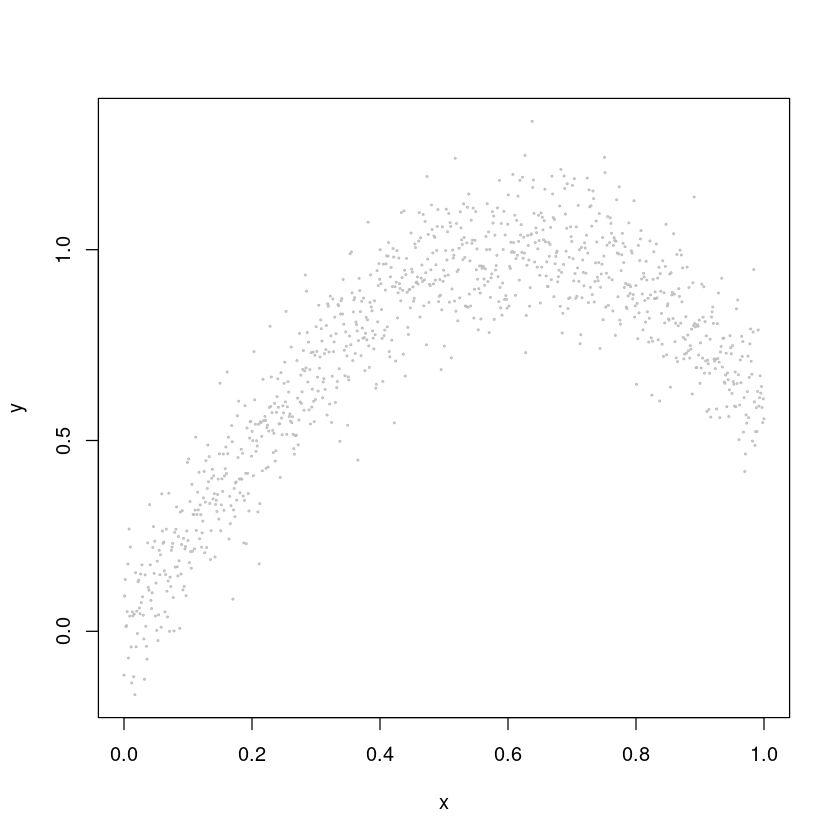

In [8]:
set.seed(1334)
x = seq(0, 1, length = 1000)
p <- 0.4
y <- sin(2 * pi * p * x) + rnorm(1000) * 0.1
plot(y ~ x, cex = .2, col = "grey")

m3 <- gamlss(y ~ pbm(x), trace = FALSE)
lines(fitted(m1) ~ x, col = "red")
yy <- -y
plot(yy ~ pbm(x), cex = .2, col = "grey")

m4 <- gamlss(yy ~ pbm(x, mono = "down"), trace = FALSE)
lines(fitted(m2) ~ x, col = "red")

## pbc()

two ends of the fitted smooth functions have identical value.


## CS ()

In [6]:
rcs1 <- gamlss(R ~ cs(Fl) + cs(A), data = rent, family = GA, trace = FALSE)
term.plot(rcs1)


ERROR: Error in parse(text = x, srcfile = src): <text>:13:7: unexpected symbol
12: lines(fitted(m2)~x, col= "red")
13: pbc() two
          ^


## ri()


In [9]:
X <- with(usair, cbind(x1, x2, x3, x4, x5, x6))
sX <- scale(X)
m5 <- gamlss(y~sX, data= usair, trace= FALSE)
m6 <- gamlss(y~ri(sX), data= usair) #ridge
m7 <- gamlss(y~ri(sX, Lp=1), data= usair) #lasso

ERROR: Error in parse(text = x, srcfile = src): <text>:9:85: unexpected symbol
8: # the thicker the line the bigger value. Negative coefficient grey, positive coefficient black.
9: mNN <- gamlss(R~nn(~Fl + A, size=5, decay=0.01), data=rent, family=GA, trace=FALSE) TR
                                                                                       ^


## PVC

In [10]:
# varying coefficient model 
mpvc <- gamlss(R ~ pb(Fl) + pb(A) + pvc(Fl, by=A), data = rent, family = GA, trace=FALSE)

ERROR: Error in parse(text = x, srcfile = src): <text>:4:85: unexpected symbol
3: # the thicker the line the bigger value. Negative coefficient grey, positive coefficient black.
4: mNN <- gamlss(R~nn(~Fl + A, size=5, decay=0.01), data=rent, family=GA, trace=FALSE) TR
                                                                                       ^


## NN

In [ ]:
# the thicker the line the bigger value. Negative coefficient grey, positive coefficient black.
mNN <- gamlss(R~nn(~Fl + A, size=5, decay=0.01), data=rent, family=GA, trace=FALSE)

## TR

In [11]:
mTR <- gamlss(R ~ tr(~Fl + A + H + B + loc), data = rent, family = GA, gd.tol = 100)

ERROR: Error in tr(~Fl + A + H + B + loc): could not find function "tr"
